In [3]:
import sys
import os
import numpy as np
from matplotlib import pyplot as plt
import scipy.signal
import torch
import time
import imageio

sys.path.append('./src')
from msg.msg import MSGNet


## Load 1 image for fine plotting, downsample by 8

In [4]:
def downsample(ar, factor):
    kernel = np.full((factor, factor), 1 / (factor**2))
    ar = scipy.signal.convolve2d(np.asarray(ar), kernel, mode='full')
    ar = ar[factor-1::factor, factor-1::factor]
    return ar

In [6]:
rgb_img.shape

(480, 720, 3)

In [33]:
# directory = '/Users/felicity/Desktop/Super-resolution-drones-depth-images/ICCV2019'
# rgb_dir = directory+'/EPFL_10_newsample_nadir/rgb/'
# _rgb_files = rgb_dir+'EPFL-2020-09-17-planned_00292_100_0039_0060.png'

# dist_dir = directory+'/EPFL_10_newsample_nadir/dist/'
# _dist_files = dist_dir+'EPFL-2020-09-17-planned_00292_100_0039_0060.dat'

directory = '/Users/felicity/Desktop/Super-resolution-drones-depth-images/ICCV2019'
rgb_dir = directory+'/comballaz_nadir/rgb/'
_rgb_files = rgb_dir+'comballaz-2020-11-06-planned_00038_100_0416_0039.png'

dist_dir = directory+'/comballaz_nadir/dist/'
_dist_files = dist_dir+'comballaz-2020-11-06-planned_00038_100_0416_0039.dat'

guide_imgs = []
target_imgs = []
rgb_img = imageio.imread(_rgb_files)
guide_imgs.append(rgb_img)
dist_img = torch.load(_dist_files)
dist_img = dist_img.detach().cpu().numpy()
target_imgs.append(dist_img)
source_img=downsample(dist_img,8)

        
guide_imgs = np.asarray(guide_imgs)      
target_imgs = np.asarray(target_imgs)
source_imgs = np.asarray(source_img)

print(guide_imgs.shape)
print('max value in the image is: ' + str(guide_imgs.max()))
print('min value in the image is: ' + str(guide_imgs.min()))
print(target_imgs.shape)
print('max value in the image is: ' + str(target_imgs.max()))
print('min value in the image is: ' + str(target_imgs.min()))
print(source_imgs.shape)
print('max value in the image is: ' + str(target_imgs.max()))
print('min value in the image is: ' + str(target_imgs.min()))



(1, 480, 720, 3)
max value in the image is: 255
min value in the image is: 0
(1, 480, 720)
max value in the image is: 374.87213
min value in the image is: 109.953354
(60, 90)
max value in the image is: 374.87213
min value in the image is: 109.953354


In [34]:
# test
t = time.time()
model = MSGNet(8)
model.load_state_dict(torch.load('checkpoints/x8_clean.pth')['model_state_dict'])

predict_imgs = model.test(source_imgs,guide_imgs[0])

predict_imgs = np.asarray(predict_imgs)
error_imgs = target_imgs - predict_imgs
elapsed = time.time() - t
print(elapsed)        

5.630030870437622


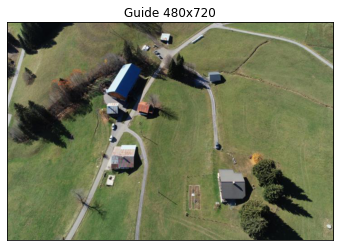

In [35]:
#Guide
plt.imshow(guide_imgs[0])
plt.tick_params(axis='x',which='both',bottom=False,top=False,labelbottom=False)
plt.tick_params(axis='y',which='both',left=False,right=False,labelleft=False)
plt.title('Guide 480x720')
plt.savefig('MSG_G_39.png',bbox_inches='tight')

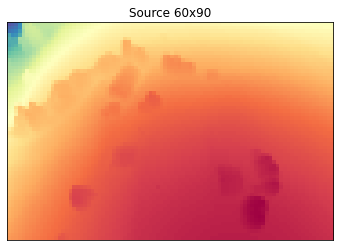

In [36]:
#source image
vmin = np.min(target_imgs)
vmax = np.max(target_imgs)
cmap = 'Spectral'

plt.imshow(source_imgs,vmin = vmin,vmax = vmax,cmap=cmap)
plt.tick_params(axis='x',which='both',bottom=False,top=False,labelbottom=False)
plt.tick_params(axis='y',which='both',left=False,right=False,labelleft=False)
plt.title('Source 60x90')
plt.savefig('MSG_S_39.png',bbox_inches='tight')

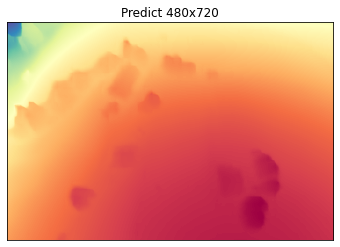

In [37]:
#predict

plt.imshow(predict_imgs,vmin = vmin,vmax = vmax,cmap=cmap)
plt.tick_params(axis='x',which='both',bottom=False,top=False,labelbottom=False)
plt.tick_params(axis='y',which='both',left=False,right=False,labelleft=False)
plt.title('Predict 480x720')
plt.savefig('MSG_P_39.png',bbox_inches='tight')

In [38]:
# # zoom predict
# plt.imshow(predict_imgs[130:190,290:380],vmin = vmin,vmax = vmax,cmap=cmap)
# plt.tick_params(axis='x',which='both',bottom=False,top=False,labelbottom=False)
# plt.tick_params(axis='y',which='both',left=False,right=False,labelleft=False)
# plt.title('Zoomed Predict Patch 60x90')
# plt.savefig('MSG_ZP_60.png',bbox_inches='tight')

In [39]:
# #error zoomed
# error = plt.imshow(error_imgs[0,130:190,290:380],vmin = -10, vmax = 10,interpolation='none')
# cbar1 = plt.colorbar(error,fraction=0.03,pad=0.04)
# plt.tick_params(axis='x',which='both',bottom=False,top=False,labelbottom=False)
# plt.tick_params(axis='y',which='both',left=False,right=False,labelleft=False)
# plt.title('Zoomed Error Patch 60x90')
# plt.savefig('MSG_ZE_60.png',bbox_inches='tight')

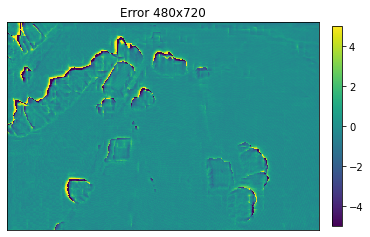

In [42]:
#error 60[-10,10], 39[-5,5]

error = plt.imshow(error_imgs[0],vmin = -5, vmax = 5,interpolation='none')
cbar1 = plt.colorbar(error,fraction=0.03,pad=0.04)
plt.tick_params(axis='x',which='both',bottom=False,top=False,labelbottom=False)
plt.tick_params(axis='y',which='both',left=False,right=False,labelleft=False)
plt.title('Error 480x720')
plt.savefig('MSG_E_39.png',bbox_inches='tight')

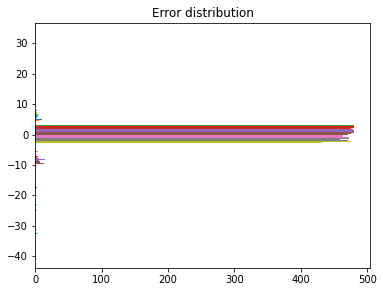

In [43]:
#error distribution
plt.figure(figsize=(4*1.5,3*1.5))
plt.hist(error_imgs[0],orientation='horizontal');
plt.title('Error distribution')
plt.savefig('MSG_D_39.png',bbox_inches='tight')

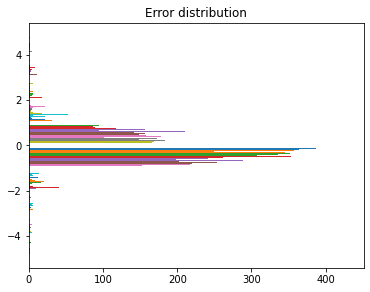

In [44]:
#bounded error distribution 60[-10,10], 39[-5,5]
plt.figure(figsize=(4*1.5,3*1.5))
plt.hist(error_imgs[0],orientation='horizontal',range=(-5,5));
plt.title('Error distribution')
plt.savefig('MSG_Drange_39.png',bbox_inches='tight')

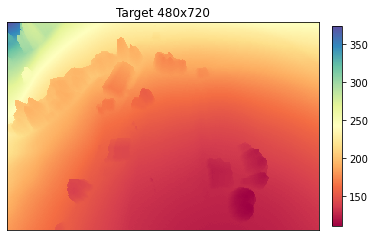

In [45]:
# target
target = plt.imshow(target_imgs[0],vmin = vmin, vmax = vmax,cmap = cmap,interpolation='none')
cbar1 = plt.colorbar(target,fraction=0.03,pad=0.04)
plt.tick_params(axis='x',which='both',bottom=False,top=False,labelbottom=False)
plt.tick_params(axis='y',which='both',left=False,right=False,labelleft=False)
plt.title('Target 480x720')
plt.savefig('MSG_T_39.png',bbox_inches='tight')

## Load all data in selected folder

In [8]:
directory = '/Users/felicity/Desktop/Super-resolution-drones-depth-images/ICCV2019'
# rgb_dir = directory+'/EPFL_10_newsample_nadir/rgb/'
# rgb_dir = directory+'/EPFL_10_newsample_ob/rgb/'
# rgb_dir = directory+'/comballaz_nadir/rgb/'
rgb_dir = directory+'/comballaz_oblique/rgb/'
_files = os.listdir(rgb_dir)
_files.sort()
_rgb_files = [rgb_dir + f for f in _files]
_rgb_files.sort()
print(len(_rgb_files))

# dist_dir = directory+'/EPFL_10_newsample_nadir/dist/'
# dist_dir = directory+'/EPFL_10_newsample_ob/dist/'
# dist_dir = directory+'/comballaz_nadir/dist/'
dist_dir = directory+'/comballaz_oblique/dist/'
_files = os.listdir(dist_dir)
_files.sort()
_dist_files = [dist_dir + f for f in _files]
_dist_files.sort()
print(len(_dist_files))

guide_imgs = []
target_imgs= []
source_imgs= []

for num in range(len(_rgb_files)):
    rgb_img = imageio.imread(_rgb_files[num])
    guide_imgs.append(rgb_img)
    dist_img = torch.load(_dist_files[num])
    dist_img = dist_img.detach().cpu().numpy()
    target_imgs.append(dist_img)
    source_imgs.append(downsample(dist_img,8))
        
guide_imgs = np.asarray(guide_imgs)
guide_imgs = np.einsum('ijkl->iljk', guide_imgs)        
target_imgs = np.asarray(target_imgs)
source_imgs = np.asarray(source_imgs)

print(guide_imgs.shape)
print('max value in the image is: ' + str(guide_imgs.max()))
print('min value in the image is: ' + str(guide_imgs.min()))
print(target_imgs.shape)
print('max value in the image is: ' + str(target_imgs.max()))
print('min value in the image is: ' + str(target_imgs.min()))
print(source_imgs.shape)
print('max value in the image is: ' + str(target_imgs.max()))
print('min value in the image is: ' + str(target_imgs.min()))


25
25
(25, 480, 720, 3)
max value in the image is: 255
min value in the image is: 0
(25, 480, 720)
max value in the image is: 889.32996
min value in the image is: 79.8521
(25, 60, 90)
max value in the image is: 889.32996
min value in the image is: 79.8521


#### Visualize data

In [290]:
# n_img = len(guide_imgs) # number of images we want to visualize
# fig, axes = plt.subplots(n_img, 3, figsize=[5 * 4, 5 * n_img])
# for axes_ in axes:
#     for ax in axes_:
#         ax.get_xaxis().set_ticks([])
#         ax.get_yaxis().set_ticks([])
# labels = ['guide (RGB)', 'x8 downsampled', 'target']
# for i, ax in enumerate(axes[0]):
#     ax.xaxis.set_label_position('top')
#     ax.set_xlabel(labels[i], fontsize=12)
# fig.subplots_adjust(wspace=0.1, hspace=0.1)


In [291]:
guide_imgs_plot = np.einsum('ijkl->iklj', guide_imgs)        
guide_imgs_plot.shape

(25, 480, 720, 3)

In [292]:
# for sample_i, sample in enumerate(range(n_img)):
#     axes[sample_i][0].imshow(guide_imgs_plot[sample])
#     p2 = axes[sample_i][1].imshow(source_imgs[sample], cmap="Spectral")
#     p3 = axes[sample_i][2].imshow(target_imgs[sample], cmap="Spectral")
#     fig.colorbar(p3, cax = fig.add_axes([0.91, 0.855 - 0.0304*sample_i , 0.005, 0.9/n_img/1.5]),shrink=0.7)


In [293]:
# %matplotlib inline
# fig

## Test

In [294]:
predict_imgs= np.copy(target_imgs) * 0

In [295]:
t = time.time()
model = MSGNet(8)
model.load_state_dict(torch.load('checkpoints/x8_clean.pth')['model_state_dict'])
for sample_i, sample in enumerate(range(n_img)):
    predict_imgs[sample] = model.test(source_imgs[sample],guide_imgs_plot[sample])

predict_imgs = np.asarray(predict_imgs)
error_imgs = target_imgs - predict_imgs
elapsed = time.time() - t
print(elapsed)        

128.24320578575134


#### Visualize results

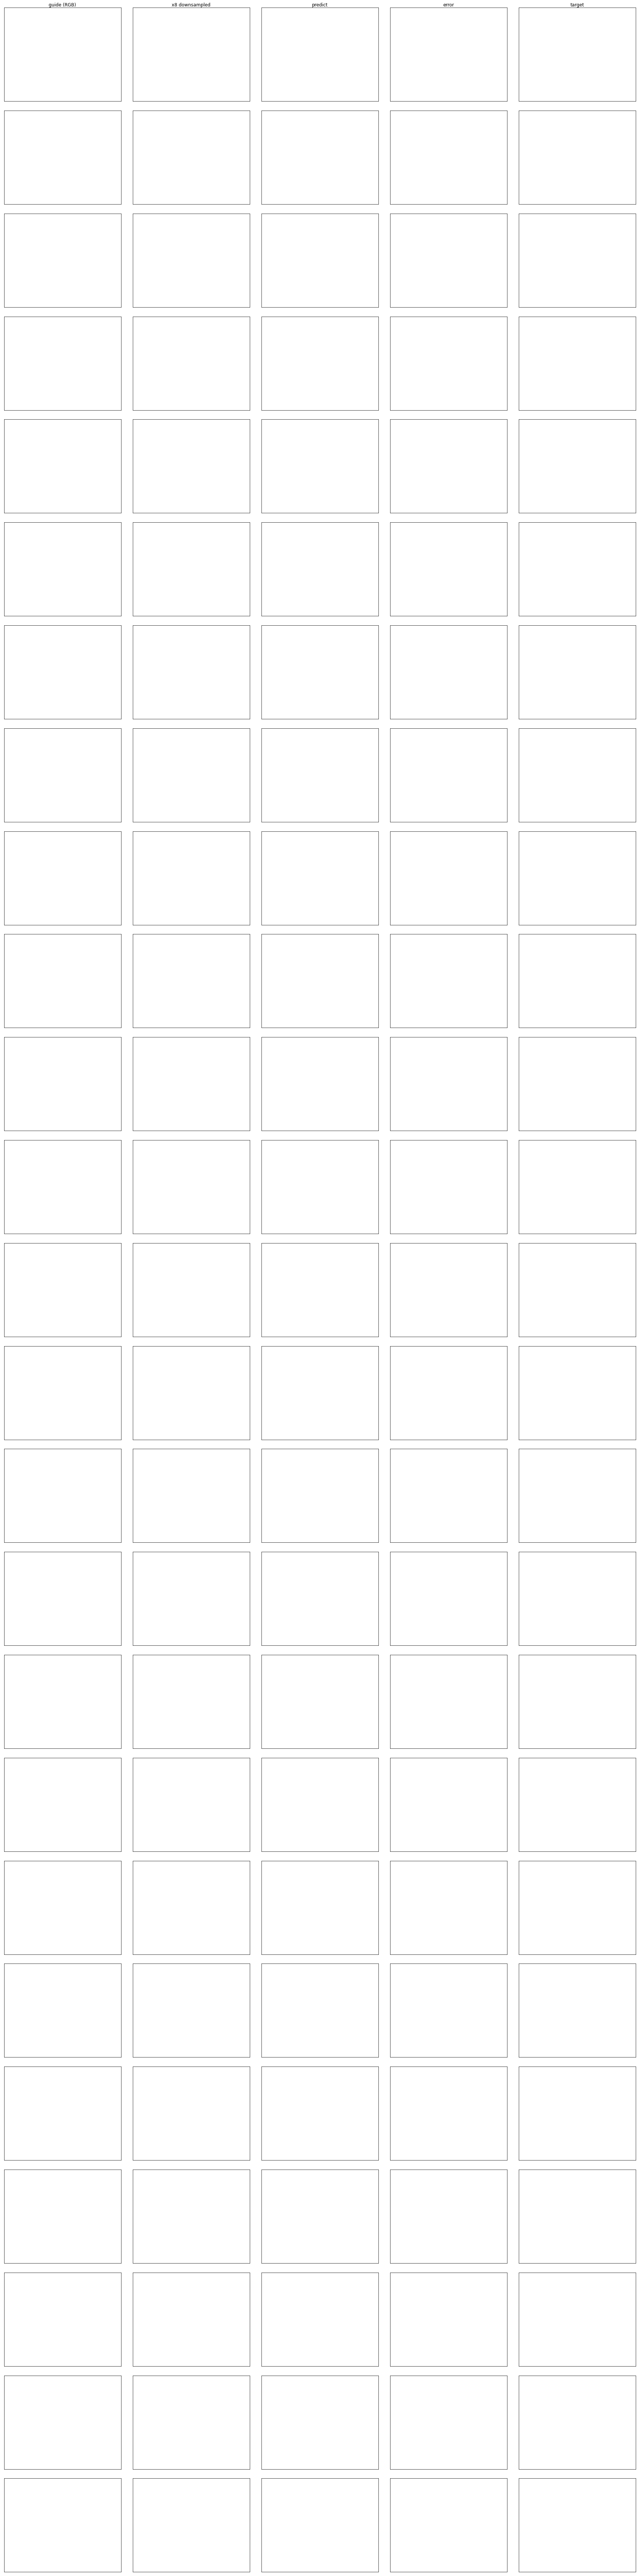

In [296]:

fig, axes = plt.subplots(n_img, 5, figsize=[6 * 5, 5 * n_img])
for axes_ in axes:
    for ax in axes_:
        ax.get_xaxis().set_ticks([])
        ax.get_yaxis().set_ticks([])
labels = ['guide (RGB)', 'x8 downsampled', 'predict','error','target']
for i, ax in enumerate(axes[0]):
    ax.xaxis.set_label_position('top')
    ax.set_xlabel(labels[i], fontsize=12)
fig.subplots_adjust(wspace=0.1, hspace=0.1)



In [297]:
for sample_i, sample in enumerate(range(n_img)):
    axes[sample_i][0].imshow(guide_imgs_plot[sample])
    axes[sample_i][1].imshow(source_imgs[sample], cmap="Spectral")
    axes[sample_i][2].imshow(predict_imgs[sample], cmap="Spectral")
    p2 = axes[sample_i][3].imshow(error_imgs[sample],interpolation='none')
    fig.colorbar(p2, cax = fig.add_axes([0.745, 0.855 - 0.0304*sample_i , 0.004, 0.9/n_img/1.5]),shrink=0.68)
    p3 = axes[sample_i][4].imshow(target_imgs[sample], cmap="Spectral")
    fig.colorbar(p3, cax = fig.add_axes([0.91, 0.855 - 0.0304*sample_i , 0.004, 0.9/n_img/1.5]),shrink=0.68)


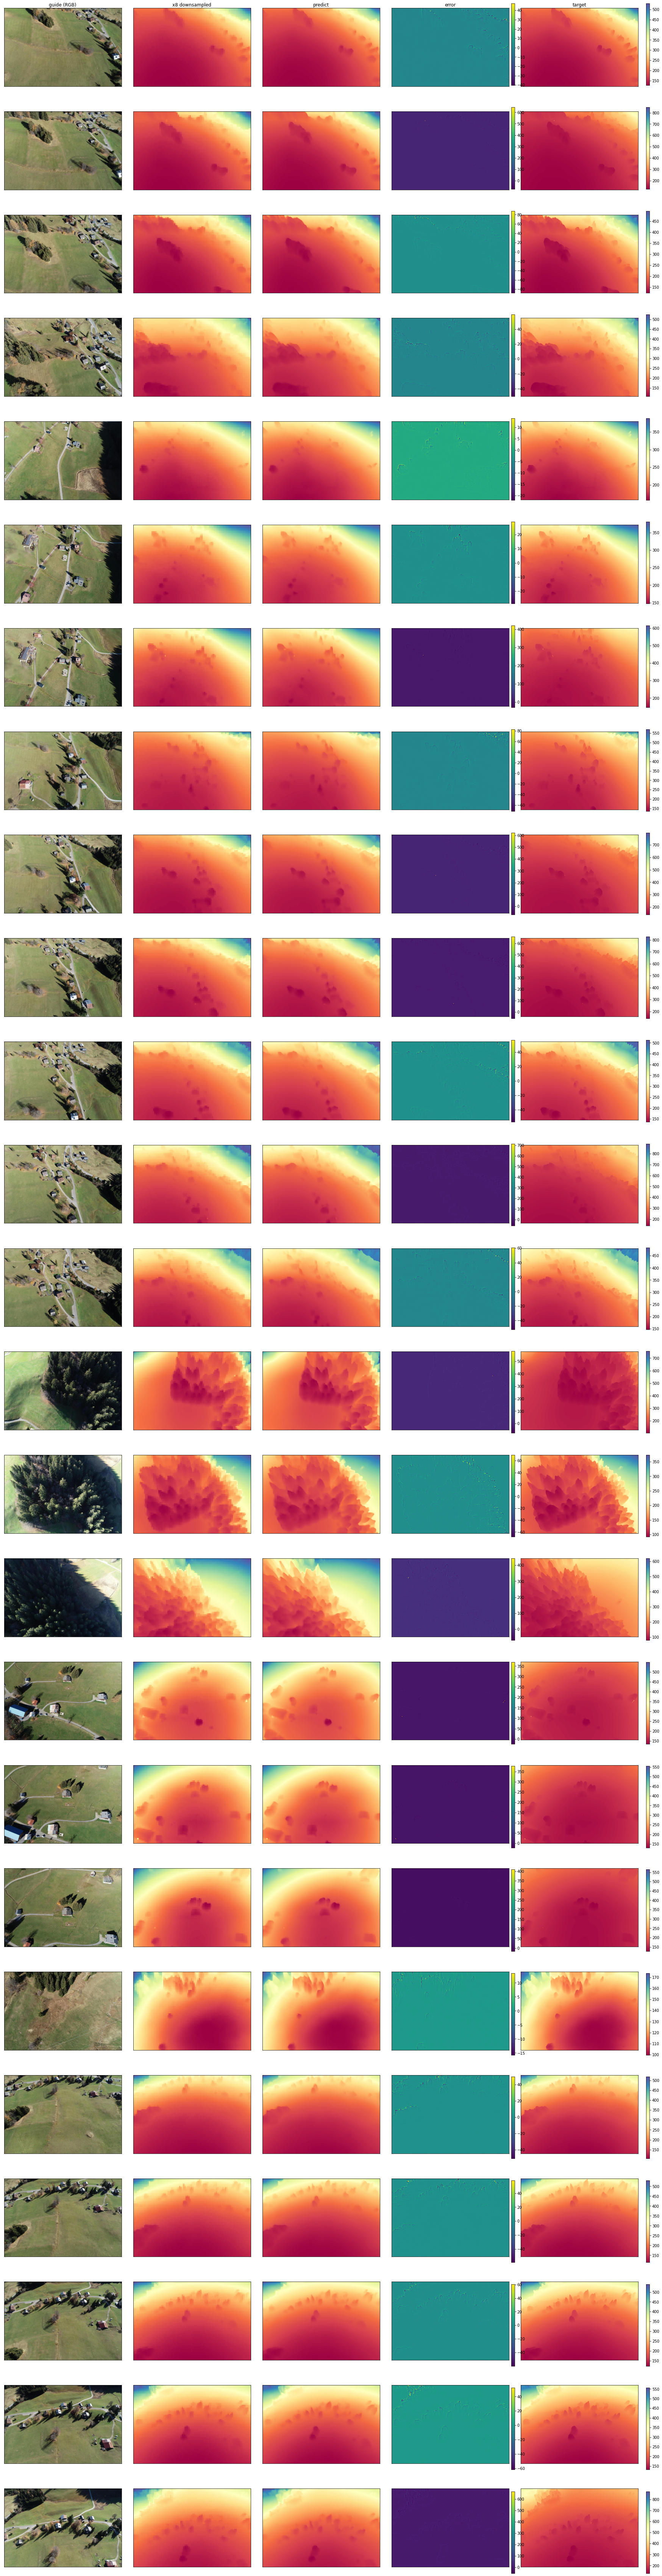

In [298]:
%matplotlib inline
fig

In [299]:
MAE = np.zeros((len(guide_imgs),1))
for sample_i, sample in enumerate(range(n_img)):
    MAE[sample] = np.mean(np.abs(error_imgs[sample]))

In [300]:
MAE

array([[0.47161025],
       [0.7820828 ],
       [0.69076395],
       [0.78302944],
       [0.23969494],
       [0.3086848 ],
       [0.33270678],
       [0.60613781],
       [0.63389438],
       [0.71388507],
       [0.69614524],
       [0.59738618],
       [0.6230951 ],
       [1.2212671 ],
       [1.35041785],
       [1.14836216],
       [0.26853633],
       [0.22642574],
       [0.20587447],
       [0.21068019],
       [0.61304539],
       [0.69883919],
       [0.63815904],
       [0.74779391],
       [0.80204773]])

In [301]:
print('Min: '+str(np.min(MAE)))
print('Max: '+str(np.max(MAE)))
print('Mean: '+str(np.mean(MAE)))
print('Median: '+str(np.median(MAE)))


Min: 0.2058744728565216
Max: 1.3504178524017334
Mean: 0.6244226330518723
Median: 0.6338943839073181


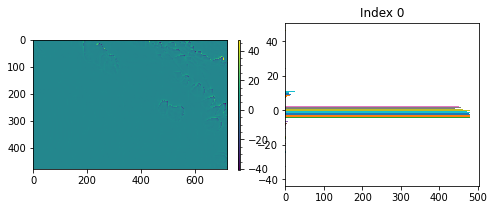

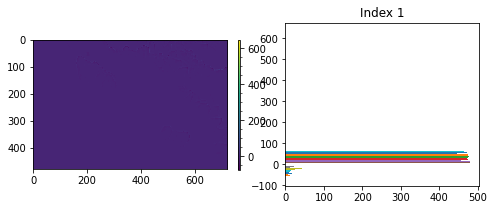

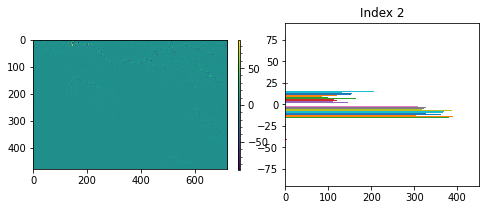

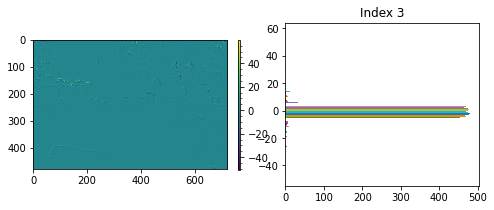

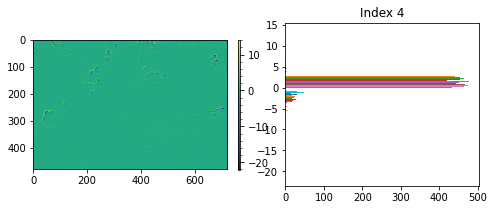

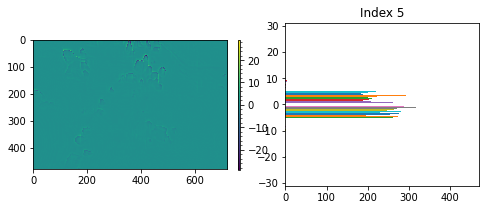

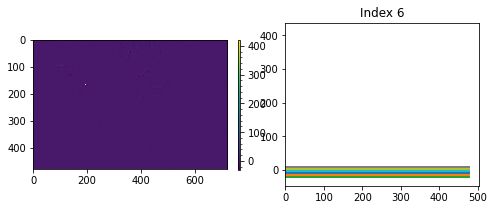

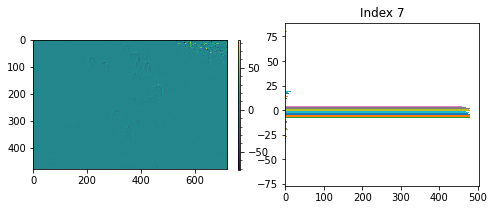

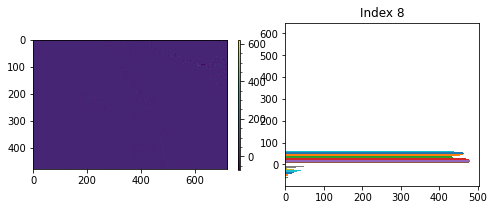

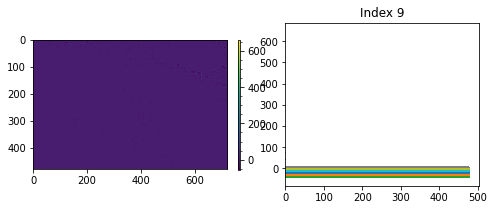

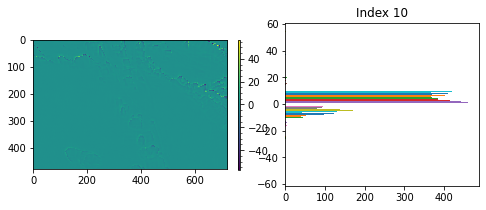

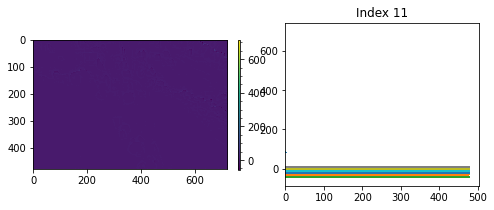

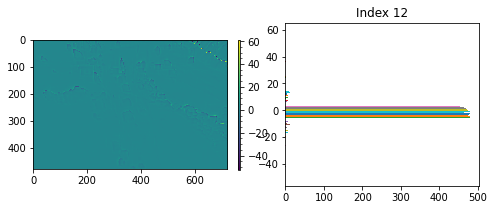

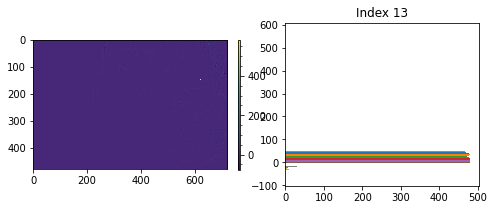

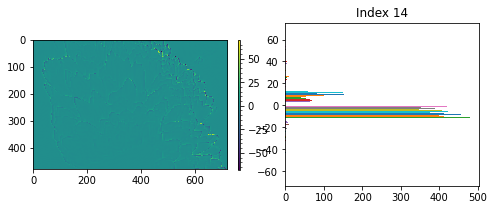

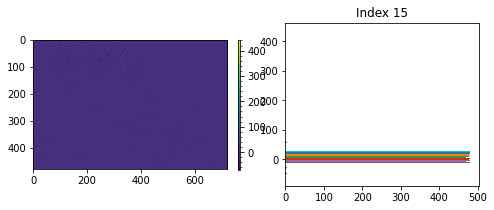

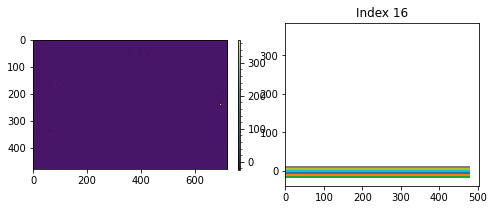

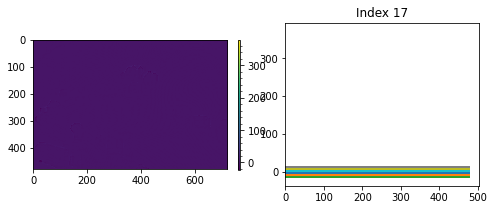

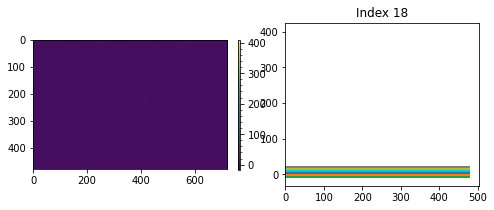

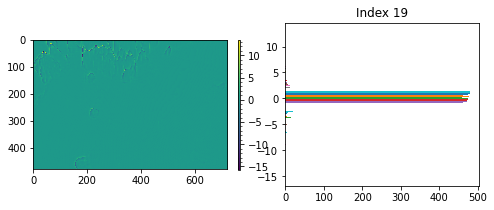

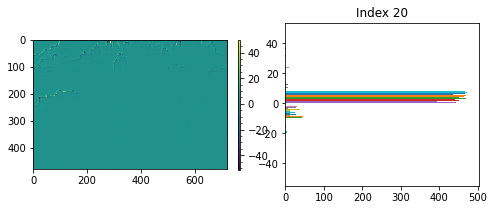

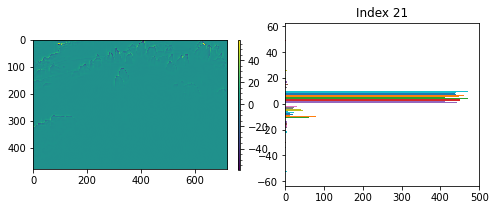

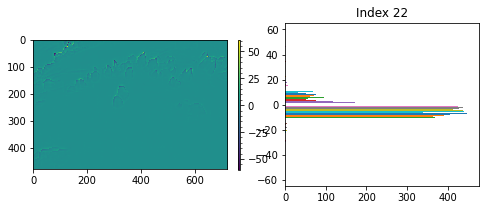

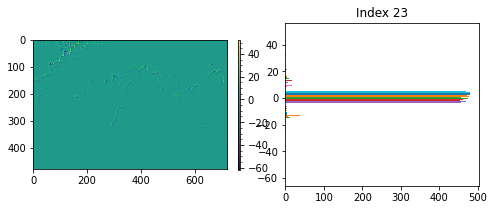

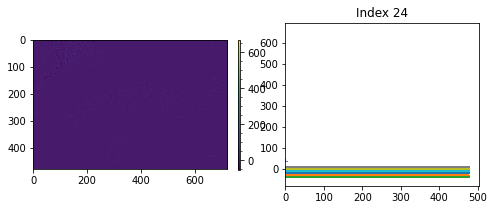

In [302]:
%matplotlib inline    
for i in range(n_img):
    fig, (ax1, ax2) = plt.subplots(figsize=(8, 3), ncols=2)
    err = ax1.imshow(error_imgs[i],interpolation='none')
    cbar = fig.colorbar(err,cax = fig.add_axes([0.48,0.2,0.005,0.6]))
    cbar.minorticks_on()
    ax2.hist(error_imgs[i],orientation="horizontal");
    ax2.title.set_text('Index ' +str(i))
    fig.subplots_adjust(wspace=0.3, hspace=0.1)
    plt.show()


In [229]:
MAE_EPFL_nadir = MAE 
# might be useful for later barchart plotting

In [272]:
MAE_EPFL_ob = MAE

In [287]:
MAE_comballaz_nadir = MAE

In [303]:
MAE_comballaz_oblique = MAE